In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの取得

In [28]:
train = pd.read_csv('houseprices_train.csv')
test = pd.read_csv('houseprices_test.csv')

# Columnの説明

In [29]:
#SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition1: Proximity to main road or railroad
#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
#HouseStyle: Style of dwelling
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior
#Foundation: Type of foundation
#BsmtQual: Height of the basement
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area
#Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Number of bedrooms above basement level
#Kitchen: Number of kitchens
#KitchenQual: Kitchen quality
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageType: Garage location
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PavedDrive: Paved driveway
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold
#YrSold: Year Sold
#SaleType: Type of sale
#SaleCondition: Condition of sale

# 前処理

In [30]:
full_data = [train, test]
data_columns = train.columns

In [31]:
for dataset in full_data:
    
    #StreetのPaveを1,Grvlを0に変換
    dataset['Street'] = dataset['Street'].map({'Pave':1, 'Grvl':0})
    
    #LotFrontageのNaNに平均値を中心とした標準正規分布する値を代入
    LFa_ave = dataset['LotFrontage'].mean()
    LFa_std = dataset['LotFrontage'].std()
    LFa_null_count = dataset['LotFrontage'].isnull().sum()
    LFa_null_random_list = np.random.randint(LFa_ave-LFa_std, LFa_ave+LFa_std, size=LFa_null_count)
    dataset['LotFrontage'][np.isnan(dataset['LotFrontage'])] = LFa_null_random_list
    dataset['LotFrontage'] = dataset['LotFrontage'].astype(int)
    
    #Yearbuiltを10年毎に数値化
    dataset.loc[ dataset['YearBuilt']>=2001, 'YearBuilt']                              = 0
    dataset.loc[(dataset['YearBuilt']>=1991)&(dataset['YearBuilt']<2001), 'YearBuilt'] = 1
    dataset.loc[(dataset['YearBuilt']>=1981)&(dataset['YearBuilt']<1991), 'YearBuilt'] = 2
    dataset.loc[(dataset['YearBuilt']>=1971)&(dataset['YearBuilt']<1981), 'YearBuilt'] = 3
    dataset.loc[(dataset['YearBuilt']>=1961)&(dataset['YearBuilt']<1971), 'YearBuilt'] = 4
    dataset.loc[(dataset['YearBuilt']>=1951)&(dataset['YearBuilt']<1961), 'YearBuilt'] = 5
    dataset.loc[(dataset['YearBuilt']>=1941)&(dataset['YearBuilt']<1951), 'YearBuilt'] = 6
    dataset.loc[(dataset['YearBuilt']>=1931)&(dataset['YearBuilt']<1941), 'YearBuilt'] = 7
    dataset.loc[(dataset['YearBuilt']>=1921)&(dataset['YearBuilt']<1931), 'YearBuilt'] = 8
    dataset.loc[(dataset['YearBuilt']>=1911)&(dataset['YearBuilt']<1921), 'YearBuilt'] = 9
    dataset.loc[(dataset['YearBuilt']>=1901)&(dataset['YearBuilt']<1911), 'YearBuilt'] = 10
    dataset.loc[(dataset['YearBuilt']>=1891)&(dataset['YearBuilt']<1901), 'YearBuilt'] = 11
    dataset.loc[(dataset['YearBuilt']>=1881)&(dataset['YearBuilt']<1891), 'YearBuilt'] = 12
    dataset.loc[(dataset['YearBuilt']>=1871)&(dataset['YearBuilt']<1881), 'YearBuilt'] = 13
    
    #YearRemodAddを10年毎に数値化
    dataset.loc[ dataset['YearRemodAdd']>=2001, 'YearRemodAdd']                              = 0
    dataset.loc[(dataset['YearRemodAdd']>=1991)&(dataset['YearRemodAdd']<2001), 'YearRemodAdd'] = 1
    dataset.loc[(dataset['YearRemodAdd']>=1981)&(dataset['YearRemodAdd']<1991), 'YearRemodAdd'] = 2
    dataset.loc[(dataset['YearRemodAdd']>=1971)&(dataset['YearRemodAdd']<1981), 'YearRemodAdd'] = 3
    dataset.loc[(dataset['YearRemodAdd']>=1961)&(dataset['YearRemodAdd']<1971), 'YearRemodAdd'] = 4
    dataset.loc[(dataset['YearRemodAdd']>=1951)&(dataset['YearRemodAdd']<1961), 'YearRemodAdd'] = 5
    dataset.loc[(dataset['YearRemodAdd']>=1941)&(dataset['YearRemodAdd']<1951), 'YearRemodAdd'] = 6
    
    #MasVnrAreaのNaNに1を代入
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
    
    #ExterQualのExを4,Gdを3,TAを2,Faを1,Poを0に変換
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
    
    #ExterCondのExを4,Gdを3,TAを2,Faを1,Poを0に変換
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
    
    #BsmtQualのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #BsmtCondのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #BsmtExposureのGdを4,Avを3,Mnを2,Noを1,NaNを0に変換
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(0).map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 0:0})
    
    #BsmtFinType1のGdを4,Avを3,Mnを2,Noを1,NaNを0に変換
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(0)\
                                .map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 0:0})
        
    #BsmtFinSF1のNaNに最頻値を代入
    dataset['BsmtFinSF1'][np.isnan(dataset['BsmtFinSF1'])] = dataset['BsmtFinSF1'].value_counts().index[0]
    
    #BsmtFinType2のGdを4,Avを3,Mnを2,Noを1,NaNを0に変換
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(0)\
                                .map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 0:0})
        
    #BsmtFinSF2のNaNに最頻値を代入
    dataset['BsmtFinSF2'][np.isnan(dataset['BsmtFinSF2'])] = dataset['BsmtFinSF2'].value_counts().index[0]
    
    #BsmtUnfSFのNaNに最頻値を代入
    dataset['BsmtUnfSF'][np.isnan(dataset['BsmtUnfSF'])] = dataset['BsmtUnfSF'].value_counts().index[0]
    
    #TotalBsmtSFのNaNに最頻値を代入
    dataset['TotalBsmtSF'][np.isnan(dataset['TotalBsmtSF'])] = dataset['TotalBsmtSF'].value_counts().index[0]
    
    #HeatingQCのExを4,Gdを3,TAを2,Faを1,Poを0に変換
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
    
    #CentralAirのYを1,Nを0に変換
    dataset['CentralAir'] = dataset['CentralAir'].map({'Y':1, 'N':0})
    
    #BsmtFullBathのNaNに最頻値を代入
    dataset['BsmtFullBath'][np.isnan(dataset['BsmtFullBath'])] = dataset['BsmtFullBath'].value_counts().index[0]
    
    #BsmtHalfBathのNaNに最頻値を代入
    dataset['BsmtHalfBath'][np.isnan(dataset['BsmtHalfBath'])] = dataset['BsmtHalfBath'].value_counts().index[0]
    
    #KitchenQualのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #FireplaceQuのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #GarageYrBltのNaNに平均値を中心とした標準正規分布する値を代入
    GYB_ave = dataset['GarageYrBlt'].mean()
    GYB_std = dataset['GarageYrBlt'].std()
    GYB_null_count = dataset['GarageYrBlt'].isnull().sum()
    GYB_null_random_list = np.random.randint(GYB_ave-GYB_std, GYB_ave+GYB_std, size=GYB_null_count)
    dataset['GarageYrBlt'][np.isnan(dataset['GarageYrBlt'])] = GYB_null_random_list
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)
    
    #GarageYrBltを10年毎に数値化
    dataset.loc[ dataset['GarageYrBlt']>=2001, 'GarageYrBlt']                                = 0
    dataset.loc[(dataset['GarageYrBlt']>=1991)&(dataset['GarageYrBlt']<2001), 'GarageYrBlt'] = 1
    dataset.loc[(dataset['GarageYrBlt']>=1981)&(dataset['GarageYrBlt']<1991), 'GarageYrBlt'] = 2
    dataset.loc[(dataset['GarageYrBlt']>=1971)&(dataset['GarageYrBlt']<1981), 'GarageYrBlt'] = 3
    dataset.loc[(dataset['GarageYrBlt']>=1961)&(dataset['GarageYrBlt']<1971), 'GarageYrBlt'] = 4
    dataset.loc[(dataset['GarageYrBlt']>=1951)&(dataset['GarageYrBlt']<1961), 'GarageYrBlt'] = 5
    dataset.loc[(dataset['GarageYrBlt']>=1941)&(dataset['GarageYrBlt']<1951), 'GarageYrBlt'] = 6
    dataset.loc[(dataset['GarageYrBlt']>=1931)&(dataset['GarageYrBlt']<1941), 'GarageYrBlt'] = 7
    dataset.loc[(dataset['GarageYrBlt']>=1921)&(dataset['GarageYrBlt']<1931), 'GarageYrBlt'] = 8
    dataset.loc[(dataset['GarageYrBlt']>=1911)&(dataset['GarageYrBlt']<1921), 'GarageYrBlt'] = 9
    dataset.loc[(dataset['GarageYrBlt']>=1901)&(dataset['GarageYrBlt']<1911), 'GarageYrBlt'] = 10
    dataset.loc[(dataset['GarageYrBlt']>=1891)&(dataset['GarageYrBlt']<1901), 'GarageYrBlt'] = 11
    
    #GarageFinishのFinを3,RFnを2,Unfを1,NaNを0に変換
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna(0).map({'Fin':3, 'RFn':2, 'Unf':1, 0:0})
    
    #GarageCarsのNaNに最頻値を代入
    dataset['GarageCars'][np.isnan(dataset['GarageCars'])] = dataset['GarageCars'].value_counts().index[0]
    
    #GarageAreaのNaNに平均値を中心とした標準正規分布する値を代入
    GA_ave = dataset['GarageArea'].mean()
    GA_std = dataset['GarageArea'].std()
    GA_null_count = dataset['GarageArea'].isnull().sum()
    GA_null_random_list = np.random.randint(GA_ave-GA_std, GA_ave+GA_std, size=GA_null_count)
    dataset['GarageArea'][np.isnan(dataset['GarageArea'])] = GA_null_random_list
    dataset['GarageArea'] = dataset['GarageArea'].astype(int)
    
    #GarageQualのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['GarageQual'] = dataset['GarageQual'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #GarageCondのExを5,Gdを4,TAを3,Faを2,Poを1,NaNを0に変換
    dataset['GarageCond'] = dataset['GarageCond'].fillna(0).map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0})
    
    #PoolQCのExを4,Gdを3,TAを2,Faを1,NaNを0に変換
    dataset['PoolQC'] = dataset['PoolQC'].fillna(0).map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 0:0})

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is tryi

In [32]:
#indexをIdに変更
train = train.set_index('Id')
test = test.set_index('Id')

# 特徴量の作成

In [33]:
class Feature(object):
    def __init__(self, data):
        self.data = data
        
class MSSubClass(Feature):
    def extract(self):
        return pd.get_dummies(self.data['MSSubClass'], prefix='MSSubClass')
    
class MSZoning(Feature):
    def extract(self):
        return pd.get_dummies(self.data['MSZoning'], prefix='MSZoning')
    
class LotFrontage(Feature):
    def extract(self):
        return self.data['LotFrontage']
    
class LotArea(Feature):
    def extract(self):
        return self.data['LotArea']
    
class Street(Feature):
    def extract(self):
        return self.data['Street']
    
class Alley(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Alley'], prefix='Alley')
    
class LotShape(Feature):
    def extract(self):
        return pd.get_dummies(self.data['LotShape'], prefix='LotShape')
    
class LandContour(Feature):
    def extract(self):
        return pd.get_dummies(self.data['LandContour'], prefix='LandContour')
    
class Utilities(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Utilities'], prefix='Utilities')
    
class LotConfig(Feature):
    def extract(self):
        return pd.get_dummies(self.data['LotConfig'], prefix='LotConfig')
    
class LandSlope(Feature):
    def extract(self):
        return pd.get_dummies(self.data['LandSlope'], prefix='LandSlope')
    
class Neighborhood(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Neighborhood'], prefix='Neighborhood')
    
class Condition1(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Condition1'], prefix='Condition1')
    
class Condition2(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Condition2'], prefix='Condition2')
    
class BldgType(Feature):
    def extract(self):
        return pd.get_dummies(self.data['BldgType'], prefix='BldgType')
    
class HouseStyle(Feature):
    def extract(self):
        return pd.get_dummies(self.data['HouseStyle'], prefix='HouseStyle')
    
class OverallQual(Feature):
    def extract(self):
        return self.data['OverallQual']
    
class OverallCond(Feature):
    def extract(self):
        return self.data['OverallCond']
    
class YearBuilt(Feature):
    def extract(self):
        return self.data['YearBuilt']
    
class YearRemodAdd(Feature):
    def extract(self):
        return self.data['YearRemodAdd']
    
class RoofStyle(Feature):
    def extract(self):
        return pd.get_dummies(self.data['RoofStyle'], prefix='RoofStyle')
    
class RoofMatl(Feature):
    def extract(self):
        return pd.get_dummies(self.data['RoofMatl'], prefix='RoofMatl')
    
class Exterior1st(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Exterior1st'], prefix='Exterior1st')
    
class Exterior2nd(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Exterior2nd'], prefix='Exterior2nd')
    
class MasVnrType(Feature):
    def extract(self):
        return pd.get_dummies(self.data['MasVnrType'], prefix='MasVnrType')
    
class MasVnrArea(Feature):
    def extract(self):
        return self.data['MasVnrArea']
    
class ExterQual(Feature):
    def extract(self):
        return self.data['ExterQual']
    
class ExterCond(Feature):
    def extract(self):
        return self.data['ExterCond']
    
class Foundation(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Foundation'], prefix='Foundation')
    
class BsmtQual(Feature):
    def extract(self):
        return self.data['BsmtQual']
    
class BsmtCond(Feature):
    def extract(self):
        return self.data['BsmtCond']
    
class BsmtExposure(Feature):
    def extract(self):
        return self.data['BsmtExposure']
    
class BsmtFinType1(Feature):
    def extract(self):
        return self.data['BsmtFinType1']
    
class BsmtFinSF1(Feature):
    def extract(self):
        return self.data['BsmtFinSF1']
    
class BsmtFinType2(Feature):
    def extract(self):
        return self.data['BsmtFinType2']
    
class BsmtFinSF2(Feature):
    def extract(self):
        return self.data['BsmtFinSF2']
    
class BsmtUnfSF(Feature):
    def extract(self):
        return self.data['BsmtUnfSF']
    
class TotalBsmtSF(Feature):
    def extract(self):
        return self.data['TotalBsmtSF']
    
class Heating(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Heating'], prefix='Heating')
    
class HeatingQC(Feature):
    def extract(self):
        return self.data['HeatingQC']
    
class CentralAir(Feature):
    def extract(self):
        return self.data['CentralAir']
    
class Electrical(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Electrical'], prefix='Electrical')
    
class FlrSF1(Feature):
    def extract(self):
        return self.data['1stFlrSF']
    
class FlrSF2(Feature):
    def extract(self):
        return self.data['2ndFlrSF']
    
class LowQualFinSF(Feature):
    def extract(self):
        return self.data['LowQualFinSF']
    
class GrLivArea(Feature):
    def extract(self):
        return self.data['GrLivArea']
    
class BsmtFullBath(Feature):
    def extract(self):
        return self.data['BsmtFullBath']
    
class BsmtHalfBath(Feature):
    def extract(self):
        return self.data['BsmtHalfBath']
    
class FullBath(Feature):
    def extract(self):
        return self.data['FullBath']
    
class HalfBath(Feature):
    def extract(self):
        return self.data['HalfBath']
    
class BedroomAbvGr(Feature):
    def extract(self):
        return self.data['BedroomAbvGr']
    
class KitchenAbvGr(Feature):
    def extract(self):
        return self.data['KitchenAbvGr']
    
class KitchenQual(Feature):
    def extract(self):
        return self.data['KitchenQual']
    
class TotRmsAbvGrd(Feature):
    def extract(self):
        return self.data['TotRmsAbvGrd']
    
class Functional(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Functional'], prefix='Functional')
    
class Fireplaces(Feature):
    def extract(self):
        return self.data['Fireplaces']
    
class FireplaceQu(Feature):
    def extract(self):
        return self.data['FireplaceQu']
    
class GarageType(Feature):
    def extract(self):
        return pd.get_dummies(self.data['GarageType'], prefix='GarageType')
    
class GarageYrBlt(Feature):
    def extract(self):
        return self.data['GarageYrBlt']
    
class GarageFinish(Feature):
    def extract(self):
        return self.data['GarageFinish']
    
class GarageCars(Feature):
    def extract(self):
        return self.data['GarageCars']
    
class GarageArea(Feature):
    def extract(self):
        return self.data['GarageArea']
    
class GarageQual(Feature):
    def extract(self):
        return self.data['GarageQual']
    
class GarageCond(Feature):
    def extract(self):
        return self.data['GarageCond']
    
class PavedDrive(Feature):
    def extract(self):
        return pd.get_dummies(self.data['PavedDrive'], prefix='PavedDrive')
    
class WoodDeckSF(Feature):
    def extract(self):
        return self.data['WoodDeckSF']
    
class OpenPorchSF(Feature):
    def extract(self):
        return self.data['OpenPorchSF']
    
class EnclosedPorch(Feature):
    def extract(self):
        return self.data['EnclosedPorch']
    
class snPorch3S(Feature):
    def extract(self):
        return self.data['3SsnPorch']
    
class ScreenPorch(Feature):
    def extract(self):
        return self.data['ScreenPorch']
    
class PoolArea(Feature):
    def extract(self):
        return self.data['PoolArea']
    
class PoolQC(Feature):
    def extract(self):
        return self.data['PoolQC']
    
class Fence(Feature):
    def extract(self):
        return pd.get_dummies(self.data['Fence'], prefix='Fence')
    
class MiscFeature(Feature):
    def extract(self):
        return pd.get_dummies(self.data['MiscFeature'], prefix='MiscFeature')
    
class MiscVal(Feature):
    def extract(self):
        return self.data['MiscVal']
    
class MoSold(Feature):
    def extract(self):
        return pd.get_dummies(self.data['MoSold'], prefix='MoSold')
    
class YrSold(Feature):
    def extract(self):
        return pd.get_dummies(self.data['YrSold'], prefix='YrSold')
    
class SaleType(Feature):
    def extract(self):
        return pd.get_dummies(self.data['SaleType'], prefix='SaleType')
    
class SaleCondition(Feature):
    def extract(self):
        return pd.get_dummies(self.data['SaleCondition'], prefix='SaleCondition')

In [940]:
class Join(Feature):
    def extract(self, feature):
        feature = feature.join(MSSubClass(self.data).extract())
        feature = feature.join(MSZoning(self.data).extract())
        feature = feature.join(LotFrontage(self.data).extract())
        feature = feature.join(LotArea(self.data).extract())
##        feature = feature.join(Street(self.data).extract())
##        feature = feature.join(Alley(self.data).extract())
##        feature = feature.join(LotShape(self.data).extract())
##        feature = feature.join(LandContour(self.data).extract())
##        feature = feature.join(Utilities(self.data).extract())
        feature = feature.join(LotConfig(self.data).extract())
##        feature = feature.join(LandSlope(self.data).extract())
        feature = feature.join(Neighborhood(self.data).extract())
##        feature = feature.join(Condition1(self.data).extract())
        feature = feature.join(Condition2(self.data).extract())
##        feature = feature.join(BldgType(self.data).extract())
        feature = feature.join(HouseStyle(self.data).extract())
        feature = feature.join(OverallQual(self.data).extract())
        feature = feature.join(OverallCond(self.data).extract())
        feature = feature.join(YearBuilt(self.data).extract())
        feature = feature.join(YearRemodAdd(self.data).extract())
##        feature = feature.join(RoofStyle(self.data).extract())
        feature = feature.join(RoofMatl(self.data).extract())
##        feature = feature.join(Exterior1st(self.data).extract())
        feature = feature.join(Exterior2nd(self.data).extract())
        feature = feature.join(MasVnrType(self.data).extract())
        feature = feature.join(MasVnrArea(self.data).extract())
        feature = feature.join(ExterQual(self.data).extract())
        feature = feature.join(ExterCond(self.data).extract())
        feature = feature.join(Foundation(self.data).extract())
        feature = feature.join(BsmtQual(self.data).extract())
##        feature = feature.join(BsmtCond(self.data).extract())
        feature = feature.join(BsmtExposure(self.data).extract())
        feature = feature.join(BsmtFinType1(self.data).extract())
        feature = feature.join(BsmtFinSF1(self.data).extract())
##        feature = feature.join(BsmtFinType2(self.data).extract())
##        feature = feature.join(BsmtFinSF2(self.data).extract())
        feature = feature.join(BsmtUnfSF(self.data).extract())
        feature = feature.join(TotalBsmtSF(self.data).extract())
##        feature = feature.join(Heating(self.data).extract())
        feature = feature.join(HeatingQC(self.data).extract())
##        feature = feature.join(CentralAir(self.data).extract())
##        feature = feature.join(Electrical(self.data).extract())
        feature = feature.join(FlrSF1(self.data).extract())
        feature = feature.join(FlrSF2(self.data).extract())
##        feature = feature.join(LowQualFinSF(self.data).extract())
        feature = feature.join(GrLivArea(self.data).extract())
        feature = feature.join(BsmtFullBath(self.data).extract())
##        feature = feature.join(BsmtHalfBath(self.data).extract())
        feature = feature.join(FullBath(self.data).extract())
        feature = feature.join(HalfBath(self.data).extract())
##        feature = feature.join(BedroomAbvGr(self.data).extract())
        feature = feature.join(KitchenAbvGr(self.data).extract())
        feature = feature.join(KitchenQual(self.data).extract())
##        feature = feature.join(TotRmsAbvGrd(self.data).extract())
##        feature = feature.join(Functional(self.data).extract())
        feature = feature.join(Fireplaces(self.data).extract())
        feature = feature.join(FireplaceQu(self.data).extract())
        feature = feature.join(GarageType(self.data).extract())
        feature = feature.join(GarageYrBlt(self.data).extract())
        feature = feature.join(GarageFinish(self.data).extract())
        feature = feature.join(GarageCars(self.data).extract())
        feature = feature.join(GarageArea(self.data).extract())
        feature = feature.join(GarageQual(self.data).extract())
##        feature = feature.join(GarageCond(self.data).extract())
        feature = feature.join(PavedDrive(self.data).extract())
##        feature = feature.join(WoodDeckSF(self.data).extract())
##        feature = feature.join(OpenPorchSF(self.data).extract())
##        feature = feature.join(EnclosedPorch(self.data).extract())
        feature = feature.join(snPorch3S(self.data).extract())
        feature = feature.join(ScreenPorch(self.data).extract())
##        feature = feature.join(PoolArea(self.data).extract())
##        feature = feature.join(PoolQC(self.data).extract())
##        feature = feature.join(Fence(self.data).extract())
##        feature = feature.join(MiscFeature(self.data).extract())
##        feature = feature.join(MiscVal(self.data).extract())
##        feature = feature.join(MoSold(self.data).extract())
##        feature = feature.join(YrSold(self.data).extract())
##        feature = feature.join(SaleType(self.data).extract())
##        feature = feature.join(SaleCondition(self.data).extract())
        return feature

In [941]:
#train用とtest用の特徴量を一つのDFとして作成
X = Join(train).extract(pd.DataFrame(index=train.index))
X_test = Join(test).extract(pd.DataFrame(index=test.index))

#XとX_testのcolumnの長さを統一
X = X.ix[:,X.columns.isin(X_test.columns)]
X_test = X_test.ix[:,X_test.columns.isin(X.columns)]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [942]:
X.columns[np.where(X.isnull().sum().values>0)]

Index([], dtype='object')

In [943]:
X_test.columns[np.where(X_test.isnull().sum().values>0)]

Index([], dtype='object')

# モデル学習

In [944]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [945]:
#モデルの定義
nor = Normalizer()
std = StandardScaler()
lr = LinearRegression()
rid = Ridge()
rfr = RandomForestRegressor()
pl = Pipeline(steps=[('std', std), ('rid', rid)])

#目的変数としてSurvivedのcolumnを定義
y = np.log(train['SalePrice'])

#trainを学習用とモデル評価用に分割
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)

#モデルを学習
pl.fit(X_train, y_train)

#学習モデルによる評価データの予測
pre_val = pl.predict(X_val)

#学習モデルの評価
print('学習モデルの評価：',pl.score(X_train, y_train))

#予測データの評価(mean_squared_error)
print('予測データの評価：',mean_squared_error(y_val, pre_val))

学習モデルの評価： 0.912862451345
予測データの評価： 0.0160124659697


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [909]:
#学習モデルの評価
print('学習モデルの評価：',pl.score(X_train, y_train))

#予測データの評価(mean_squared_error)
print('予測データの評価：',mean_squared_error(y_val, pre_val))

学習モデルの評価： 0.912862451345
予測データの評価： 0.0160124659697


# データの可視化

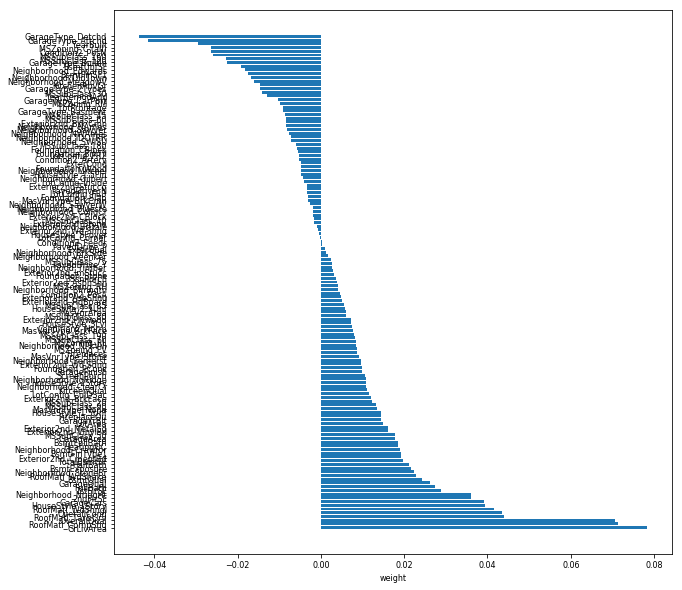

In [947]:
coef = sorted(dict(zip(X_val.columns, rid.coef_)).items(), key=lambda x: -x[1])
x_values = np.linspace(1, len(coef), len(coef))
x_name = [coef_i[0] for coef_i in coef]
y_values = [coef_i[1] for coef_i in coef]
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 8
plt.barh(x_values, y_values)
plt.xlabel('weight')
plt.yticks(x_values, x_name)
#plt.ylim(0, )
plt.show()

# ファイル作成

In [948]:
#学習モデルによるテストデータの予測
predictions = pl.predict(X_test)

#CSVファイルを作成
submission = pd.DataFrame({'Id':X_test.index.values, 'SalePrice':predictions})
submission.to_csv('houseprices_submission.csv', index=False)